Gibt es Tage an denen man eher gewinnt als an anderen? Bewerten die Kandidaten an jedem Tag gleich, oder sind sie am Ende der Woche großzügiger als am Anfang der Woche?

In [1]:
# Laden einiger Bibliotheken
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Grafik style
sns.set_style("whitegrid")

Die Ergebnisse aller Folgen, die wir bisher gesehen haben, können als ein Dataframe geladen werden.

Die meisten Spalten sollten selbsterklärend sein. Die Spalten `K1` bis `K5` enthalten die Wertungen der Kandidaten 1 bis 5. Die Spalte mit `NaN` Eintrag ist der Koch der Folge. Die Spalte `Summe` enthält die Punktzahl des Dinners. Die Spalten `M`, `A` und `C` enthalten die Wertungen von Mikkel, Andi und dem Chat.

In [2]:
# lade den Datensatz
df = pd.read_csv("../data/bewertungen.csv", parse_dates=["Datum"], dayfirst=True)

# betrachte nur wochen mit 5 Tagen um es uns einfacher zu machen
df = df.groupby("WochenID").filter(lambda x: len(x) == 5)

# füge eine weitere spalte 'tag_in_woche' ein
df["tag_in_woche"] = df.groupby("WochenID").cumcount() + 1

# zeige die letzten 10 Einträge
df.tail(10)

,WochenID,FolgenID,Datum,Ort,K1,K2,K3,K4,K5,Summe,M,A,C,Person,Bemerkung,YT-Link,tag_in_woche
34,8,1976,2013-12-02,Berlin,NaN,7.0,8.0,7.0,8.0,30,8.0,7.0,7.0,Katharina,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,1
35,8,1977,2013-12-03,Berlin,6.0,NaN,7.0,7.0,7.0,27,7.0,8.0,7.0,Nydal,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,2
36,8,1978,2013-12-04,Berlin,7.0,7.0,NaN,8.0,8.0,30,7.0,8.0,8.0,Claudia,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,3
37,8,1979,2013-12-05,Berlin,8.0,6.0,9.0,NaN,9.0,32,4.0,3.0,3.0,Lukas,"U30, 8h-Dinner",https://www.youtube.com/watch?v=SN1KuiYpFik,4
38,8,1980,2013-12-06,Berlin,7.0,5.0,8.0,6.0,NaN,26,8.0,8.0,7.0,Cissy,U30,https://www.youtube.com/watch?v=SN1KuiYpFik,5
39,9,1379,2011-07-25,Paris,NaN,6.0,6.0,6.0,7.0,25,6.0,6.0,6.0,Lea,Paris,NaN,1
40,9,1380,2011-07-26,Paris,7.0,NaN,7.0,8.0,9.0,31,6.0,6.0,6.0,Oliver,Paris,NaN,2
41,9,1381,2011-07-27,Paris,6.0,7.0,NaN,7.0,8.0,28,6.0,6.0,7.0,Raimund,Paris,NaN,3
42,9,1382,2011-07-28,Paris,8.0,7.0,8.0,NaN,9.0,32,9.0,10.0,9.0,Jakob,Paris,NaN,4
43,9,1383,2011-07-29,Paris,6.0,6.0,7.0,7.0,NaN,26,7.0,6.0,6.0,Tanja,Paris,NaN,5


Wir können uns als erstes die Verteilung der Punkte anschauen. 

Alle Kandidaten haben zwischen 22 und 38 Punkte bekommen, im Durchschnitt 29 Punkte.

count    40.000000
mean     29.000000
std       3.637412
min      22.000000
25%      26.000000
50%      30.000000
75%      31.250000
max      38.000000
Name: Summe, dtype: float64

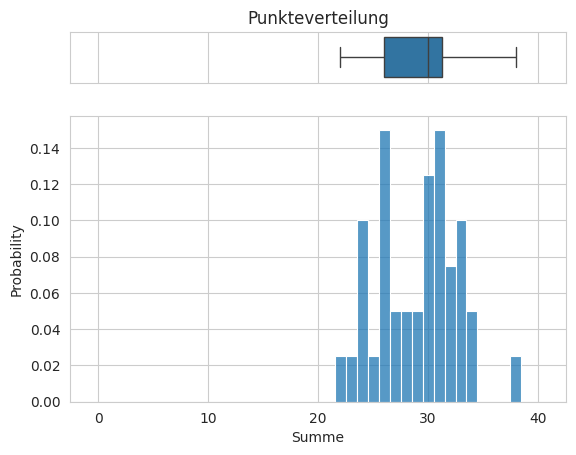

In [3]:
# gemeinsame figur für histplot und boxplot
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)

# histplot
sns.histplot(
    data=df["Summe"], stat="probability", discrete=True, binrange=(0, 40), ax=ax_hist
)

# boxplot
sns.boxplot(data=df["Summe"], ax=ax_box, orient="h").set_title("Punkteverteilung")

df["Summe"].describe()

Um die ursprüngliche Frage zu beantworten, schauen wir uns die Punkteverteilung nach Wochentag an.

<Axes: title={'center': 'Punkte nach Wochentag'}, xlabel='tag_in_woche', ylabel='Summe'>

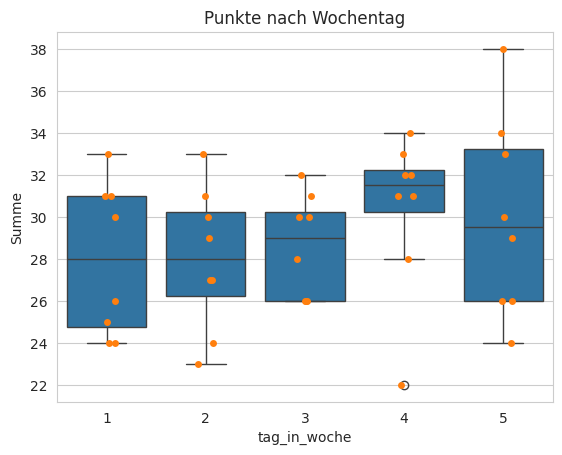

In [4]:
# boxplots nach tag
sns.boxplot(data=df, x="tag_in_woche", y="Summe").set_title("Punkte nach Wochentag")

# zeige die einzelnen beobachtungen
sns.stripplot(data=df, x="tag_in_woche", y="Summe")

Der Ausreißer am Donnerstag verzehrt die Grafik ein wenig, aber man sieht einen Trend, dass zum Ende der Woche hin besser bewertet wird als zu beginn der Woche.

Die durchschnittliche Bewertung (`mean`) steigt fast jeden Tag an. Der Median (`50%`) ist am Donnerstag am höchsten.

In [5]:
df[["tag_in_woche", "Summe"]].groupby("tag_in_woche").describe(percentiles=[])

Summe                                    
             count    mean       std   min   50%   max
tag_in_woche                                          
1              8.0  28.000  3.625308  24.0  28.0  33.0
2              8.0  28.000  3.422614  23.0  28.0  33.0
3              8.0  28.625  2.445842  26.0  29.0  32.0
4              8.0  30.375  3.814914  22.0  31.5  34.0
5              8.0  30.000  4.750940  24.0  29.5  38.0

Man sieht deutliche unterschiede. Der Donnerstag hat die höchste durchschnittliche Bewertung und scheint, wenn man den Ausreißer ignoriert, der Tag zu sein, an dem es die wenigste Streuung gibt.

In [6]:
round(df.groupby("tag_in_woche")["Summe"].mean(), 1)

tag_in_woche
1    28.0
2    28.0
3    28.6
4    30.4
5    30.0
Name: Summe, dtype: float64

An welchem Wochentag wird nun am häufigsten gewonnen?

Text(0.5, 1.0, 'Sieger nach Wochentag')

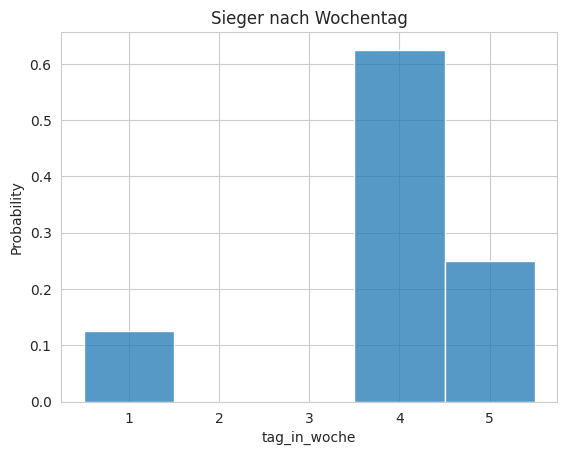

In [7]:
# 1. Plätze je Woche
erster_platz = df.loc[df.groupby("WochenID")["Summe"].idxmax()]

# histplot
sns.histplot(erster_platz["tag_in_woche"], discrete=True, stat="probability").set_title(
    "Sieger nach Wochentag"
)